# Group Project Proposal

### Introduction

In school, the way used to measure a student’s knowledge is often through exams. To do well on exams, students often resort to spending as much time as possible to study in preparation for them. We want to investigate whether study time and exam results have an impact on a person’s knowledge level of that subject.

**The question we are trying to answer is: based on the time they spend studying and exam performance, what knowledge level would the user have on a subject?**

We are using the [User Knowledge Modeling](https://archive.ics.uci.edu/dataset/257/user+knowledge+modeling) dataset from the UCI Machine Learning Repository. There 403 observations which have been already split – 258 in the training dataset, and 145 in the testing set. The set contains no missing values. The dataset contains the following columns, in the order of left to right:

- user’s degree of study time for the goal subject materials (STG)
- user's the degree of repetition for studying the goal subject materials (SCG)
- user’s degree of study time for related subjects (STR)
- user's exam performance for related subjects (LPR)
- user's exam performance for the goal subject (PEG)
- user's knowledge level (UNS)-- classified as very low, low, middle, or high. 

Aside from UNS which indicates the knowledge level of users, the other columns are all dbl variables.


### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse) #loading packages
library(repr)
library(rvest)
library(stringr)
library(readxl)
library(dplyr)
library(yardstick)

library(tidymodels)

install.packages("ISLR")
install.packages("GGally")
install.packages("kknn")

library(kknn)
library(ISLR)
library(GGally)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ recipes      1.0.4
✔ dials        1.1.0     ✔ rsample      1.1.1
✔ infer        1.0.4     ✔ tune         1.0.1
✔ modeldata    1.0.1     ✔ workflows    1.1.2
✔

### Reading and Tidying Data

In [2]:
# reading data from url into jupyter

training_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Training_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv") |>
select(STG, SCG, STR, LPR, PEG, UNS)

testing_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Test_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv")


head(training_data)
tail(training_data)
head(testing_data)
tail(testing_data )


New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 145 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.54,0.51,0.55,0.64,0.19,Low
0.61,0.78,0.69,0.92,0.58,High
0.78,0.61,0.71,0.19,0.60,Middle
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.68,0.61,0.34,0.31,0.23,Low
0.90,0.78,0.62,0.32,0.89,High
0.85,0.82,0.66,0.83,0.83,High
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


<b> Figure 1 , 2 , 3 and 4: </b>

The data loaded from the web and show the figure of the first and final rows of each dataset.

In [3]:
# data is already tidy

### Summarizing the Data

Now, the data is already read. Our next step is to count and find the mean of each varibles for different category level of UNS. 

In [4]:
#summarize

counts_class <- training_data |>
                group_by(UNS) |>
                summarize(count_class = n())

mean_estimates<-training_data|>
group_by(UNS)|>
summarize(mean_STG=mean(STG),
          mean_TEG=mean(PEG),
          mean_SCG=mean(STG),
          mean_STR=mean(PEG),
            mean_LPR=mean(LPR))|>
cbind(count=counts_class$count_class)

mean_estimates


UNS,mean_STG,mean_TEG,mean_SCG,mean_STR,mean_LPR,count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
High,0.4216508,0.77253968,0.4216508,0.77253968,0.5012698,63
Low,0.3211446,0.23762651,0.3211446,0.23762651,0.4973494,83
Middle,0.3999773,0.54238636,0.3999773,0.54238636,0.3428409,88
very_low,0.3057917,0.09083333,0.3057917,0.09083333,0.3587500,24


<b> Figure 5: </b>

The mean and count for each varibles (STG, TEG, SCG, STR and LPR) and UNS level


According to the group_by and summarize function, we can see that for different UNS level, the mean of STG, TEG, SCG, STR and LPR are different. These means all these varibles are helpful to help us in predicting a new observation. But it is not realistic to use all varibles as the predictors, so we still need further operation to choose the decide the most useful varibles.

In [14]:
#finds the mean of predictors

select_training_data <- training_data |>
select(STG, STR, LPR, PEG, UNS) # selecting the variables


#count the number of cells with na and renamed it into column count_ca
data_count_na <- summarize(select_training_data, count_na = sum(is.na(select_training_data)))

data_count_na
#since there are no n/a, there are no rows with n/a

count_na
<int>
0


<b> Figure 6: </b>

Count the rows include missing value

### Exploratory Data Analysis -- Visualizations

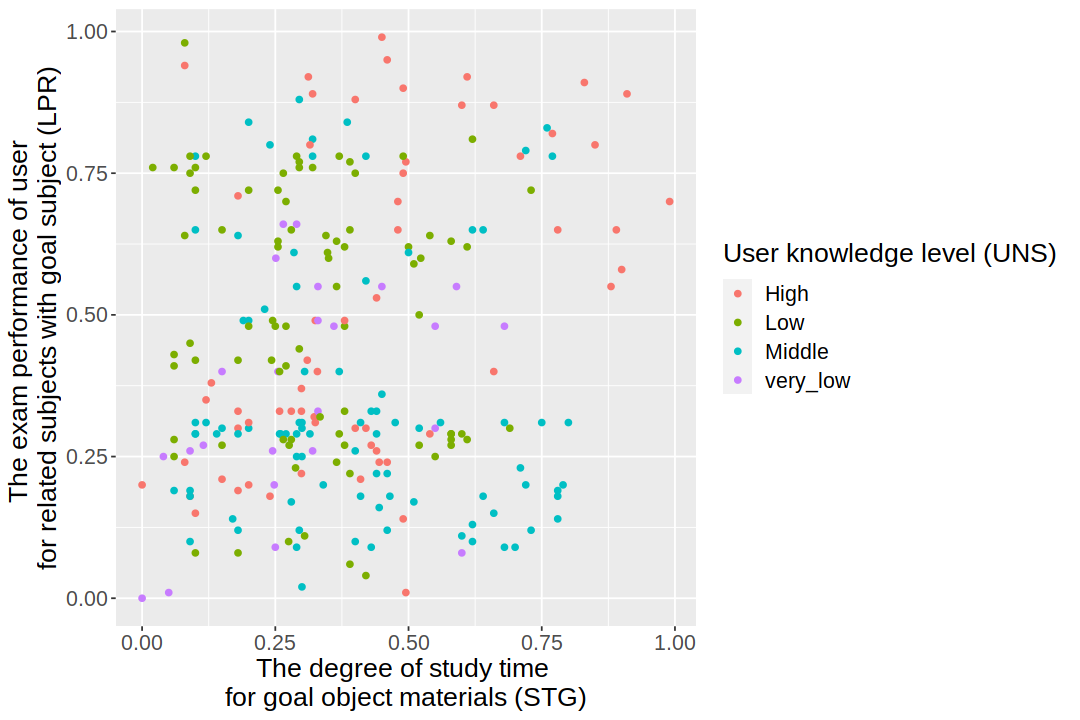

In [6]:
#data visualizations of the distributions of different variables

set.seed (1234)
options(repr.plot.width = 9, repr.plot.height = 6)

stg_str_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = STR, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal subject materials (STG)",
             y = "The degree of study time of user \n for related objects with goal object (STR)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))
 
stg_peg_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal object materials (STG)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

stg_lpr_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = LPR, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal object materials (STG)",
             y = "The exam performance of user \nfor related subjects with goal subject (LPR)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

str_lpr_plot <- select_training_data |>
    ggplot(aes(x = STR, 
               y = LPR, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time of user \n for related objects with goal object (STR)",
             y = "The exam performance of user \nfor related subjects with goal subject (LPR)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

 
str_peg_plot <- select_training_data |>
    ggplot(aes(x = STR, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time of user \n for related objects with goal object (STR)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))


lpr_peg_plot <- select_training_data |>
    ggplot(aes(x = LPR, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The exam performance of user \nfor related subjects with goal subject (LPR)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

#stg_str_plot
#stg_peg_plot
stg_lpr_plot
#str_lpr_plot
#str_peg_plot
#lpr_peg_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


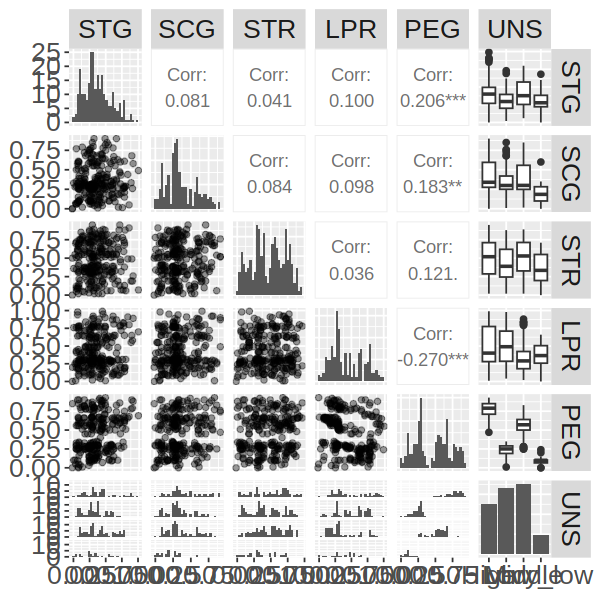

In [7]:
set.seed (1234)
options(repr.plot.width = 5, repr.plot.height = 5)

pairplot <- training_data |> 
     ggpairs(
         lower = list(continuous = wrap('points', alpha = 0.4)),
         diag = list(continuous = "barDiag")
     ) +
     theme(text = element_text(size = 20))

pairplot

Since our predictors does not appears to have high correlation, we didn't expect our model to predict at a high level of accuracy. The highest correlated number we get is 0.206 and -0.270, so we will work with these two predictors which are user's exam performance and their study time on goal subject, and it will be easier to visualize two predictors.

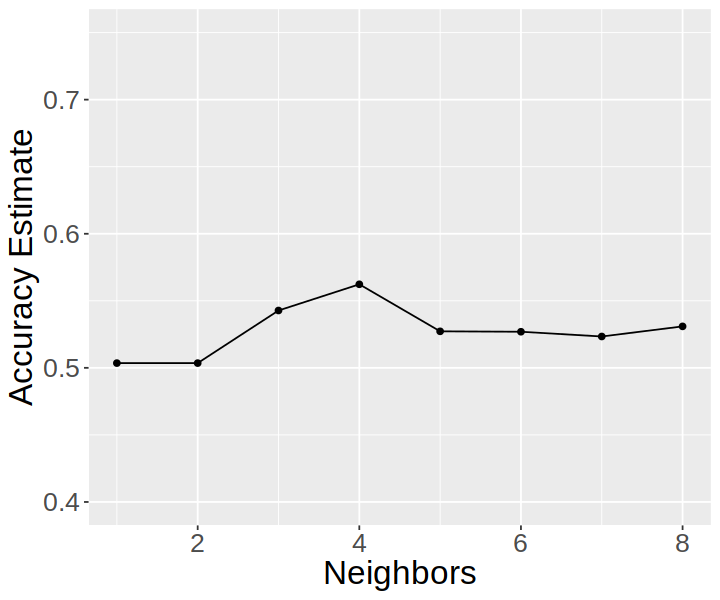

In [8]:
set.seed (1234)

options(repr.plot.height = 5, repr.plot.width = 6)

### BEGIN SOLUTION
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

mnist_recipe <- recipe(UNS ~LPR+ STG, data = training_data)

mnist_vfold <- vfold_cv(training_data, v = 5, strata = UNS)

knn_results <- workflow() |>
                 add_recipe(mnist_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = mnist_vfold, grid = tibble(neighbors = c(1,2,3,4,5,6,7,8))) |>
                 collect_metrics()

accuracies <- knn_results |>
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20)) +
                  scale_x_continuous(breaks = seq(0, 20, 2)) +
                  scale_y_continuous(limits = c(0.4,0.75))

cross_val_plot


We see that we get highest accuracy with 2 neighbors, so we will be working with that

In [9]:

new_training_data<-training_data|>
select(UNS, LPR, STG) |>
mutate(LPR=as.numeric(LPR))|>
mutate(STG=as.numeric(STG)) |>
mutate(UNS = as.factor(str_replace(training_data$UNS, "Very Low", "very_low"))) 

new_testing_data<-testing_data|>
select(UNS, LPR, STG)|>
mutate(LPR=as.numeric(LPR))|>
mutate(STG=as.numeric(STG)) |>
mutate(UNS = as.factor(str_replace(testing_data$UNS, "Very Low", "very_low")))

In [10]:
set.seed (1234)

pred1 <- tibble( LPR= 0.87, STG=0.55)

recipe<-recipe(UNS~LPR+STG, data=new_training_data)|>
 step_scale(all_predictors())|>
    step_center(all_predictors())

knn_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
       set_engine("kknn") |>
       set_mode("classification")


fit<- workflow() |>
          add_recipe(recipe) |>
          add_model(knn_spec) |>
          fit(data = new_training_data)

predicted1<-predict(fit, pred1)
predicted1

.pred_class
<fct>
High


In [11]:
set.seed (1234)
test_predictions <- predict(fit, new_testing_data) |>
  bind_cols(new_testing_data)


classification_metrics <- test_predictions |>
metrics(truth = UNS, estimate=.pred_class)|>
filter(.metric=="accuracy")


classification_metrics


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.3448276


### Methods

To conduct our data analysis, we will use a K-nearest neighbor classifier to predict the UNS of our test observations, with the training, predicting, evaluating, and tuning methods we learned in class. We will use the variables STG, STR, LPR, and PEG to predict the class. We will not use the variable SCG since it does not pertain to our question of study time and exam performance. We will use a scatterplot/several scatterplots to visualize our results.

### Analysis

-it seems like study time does not have a strong impact on one's exam performance, more depends on their knowledge level.

### Expected Outcomes and Significance

The findings should not only allow us to predict a user's knowledge level based on the different variables, but also show whether spending a lot of time studying and performing well in exams is correlated to having a high knowledge level in a subject. The results of the findings could have several impacts: for example, a student's perspective on test-taking and studying may be shifted if the findings show that studying a lot and high performance in exams does not have a strong correlation with high knowledge level. Additionally, an educator may consider reforming their curriculum if a student's performance on tests is not indicative of them actually gaining a high level of knowledge for the material. Some future questions the findings could hypothetically lead to, depending on the outcomes of this project, are:

- Are there methods of evaluating a student's learning that are better than exams, in terms of helping students gain high knowledge levels of subjects?
- If study time does not necessarily correlate with having a high knowledge level, which study methods (i.e. repetition) could be used to help students retain a high knowledge level?
- If a student has a high knowledge level of one subject, will it be easier for them to gain a high knowledge level of a related subject?

### References

Kahraman,Hamdi, Colak,Ilhami, and Sagiroglu,Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.